<a href="https://colab.research.google.com/github/Judeeme/Greenhouseproject/blob/main/Extracted11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 95.2 MB/s eta 0:00:00


In [3]:
import mne

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:

edf_path = r"/content/sample_data/10000_17728.edf"

In [7]:
raw = mne.io.read_raw_edf(edf_path, preload=True)
raw.crop(tmin=0, tmax=180)

Extracting EDF parameters from /content/sample_data/10000_17728.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-2736860115.py:1: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Reading 0 ... 733183  =      0.000 ...  2863.996 secs...


<RawEDF | 10000_17728.edf, 25 x 46081 (180.0 s), ~8.8 MiB, data loaded>

In [15]:
data, times = raw[:5, :]

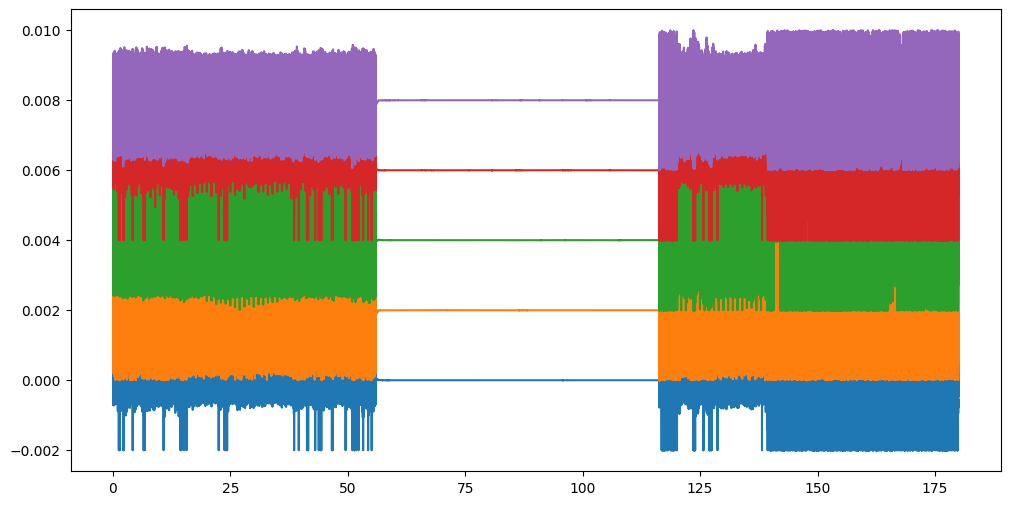

In [16]:
plt.figure(figsize=(12, 6))
offset = 0
for i in range(data.shape[0]):
    plt.plot(times, data[i] + offset, label=raw.ch_names[i])
    offset += np.max(data[i])

/tmp/ipython-input-1745881222.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


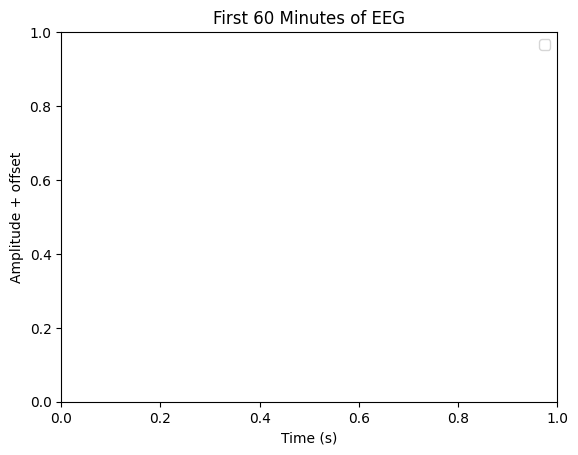

In [12]:
plt.xlabel("Time (s)")
plt.ylabel("Amplitude + offset")
plt.title("First 60 Minutes of EEG")
plt.legend()
plt.show()

In [17]:
import pandas as pd


In [18]:
raw = mne.io.read_raw_edf(edf_path, preload=True)

Extracting EDF parameters from /content/sample_data/10000_17728.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9109503  =      0.000 ... 35583.996 secs...


In [19]:
raw.crop(tmin=0, tmax=180)

<RawEDF | 10000_17728.edf, 25 x 46081 (180.0 s), ~8.8 MiB, data loaded>

In [20]:
data, times = raw.get_data(return_times=True)

In [21]:
df = pd.DataFrame(data.T, columns=raw.ch_names)  # transpose so rows = time points
df['Time (s)'] = times

In [24]:
print(df.head(10))

   EOG LOC-M2  EOG ROC-M1  EMG Chin2-Chin1  EEG F3-M2  EEG F4-M1  EEG C3-M2  \
0   -0.000120   -0.001364        -0.001446   0.000410   0.000682   0.000894   
1    0.000682    0.000339        -0.000097   0.000610  -0.001239   0.000595   
2    0.000429    0.001837         0.001631   0.000093  -0.000696  -0.000637   
3   -0.000171   -0.000075         0.000403  -0.000008   0.000725  -0.000228   
4   -0.000230   -0.001785        -0.001557   0.000112   0.001068   0.000736   
5    0.000628   -0.000271        -0.000672   0.000463  -0.000728   0.000768   
6    0.000957    0.001509         0.000976   0.000208  -0.001474  -0.000167   
7    0.000462    0.001774         0.001655  -0.000130  -0.000198  -0.000805   
8   -0.000189   -0.001546        -0.001408  -0.000187   0.001239   0.000506   
9    0.000359   -0.000362        -0.000853   0.000132  -0.000264   0.000643   

   EEG C4-M1  EEG O1-M2  EEG O2-M1  EEG CZ-O1  ...  Resp Abdominal      SpO2  \
0  -0.000704   0.000717   0.000509  -0.001358  ...

In [25]:
df.to_csv(r"D:\SleepData\EEG_first_3min.csv", index=False)
print("✅ Data saved to EEG_first_3min.csv")

✅ Data saved to EEG_first_3min.csv


In [26]:
print("Channels in file:", raw.ch_names)

Channels in file: ['EOG LOC-M2', 'EOG ROC-M1', 'EMG Chin2-Chin1', 'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1', 'EMG LLeg-RLeg', 'ECG EKG2-EKG', 'Snore', 'Resp PTAF', 'Resp Airflow', 'Resp Thoracic', 'Resp Abdominal', 'SpO2', 'Rate', 'EtCO2', 'Capno', 'Resp Rate', 'C-flow', 'Tidal Vol', 'Pressure']


In [27]:
spo2_channels = [ch for ch in raw.ch_names if "spo" in ch.lower() or "saO2" in ch.lower()]

In [28]:
print("Channels in file:", raw.ch_names)

Channels in file: ['EOG LOC-M2', 'EOG ROC-M1', 'EMG Chin2-Chin1', 'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1', 'EMG LLeg-RLeg', 'ECG EKG2-EKG', 'Snore', 'Resp PTAF', 'Resp Airflow', 'Resp Thoracic', 'Resp Abdominal', 'SpO2', 'Rate', 'EtCO2', 'Capno', 'Resp Rate', 'C-flow', 'Tidal Vol', 'Pressure']


In [29]:
spo2_data, times = raw.copy().pick_channels(spo2_channels).get_data(return_times=True)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [33]:
df_spo2 = pd.DataFrame({
    "Time (s)": times,
    "SpO2 (%)": spo2_data[0]  # first (and probably only) channel
})

In [34]:
print(df_spo2.head(10))

   Time (s)  SpO2 (%)
0  0.000000  0.002438
1  0.003906  0.002438
2  0.007812  0.002438
3  0.011719  0.002438
4  0.015625  0.002438
5  0.019531  0.002438
6  0.023438  0.002438
7  0.027344  0.002438
8  0.031250  0.002438
9  0.035156  0.002438
